# QAHE chiral state 

In the paper, the lattice constant a=1 nm, and the Fermi energy is taken as E_F=3 meV.
However, if also use the magnetic topological insulator model for the leads, the E_F need to take values higher than about 8 meV to avoid the gap region in the small m cases.

## The center is MTI ,and the leads are MIT.

In [1]:
import kwant
import numpy as np
import matplotlib.pyplot as plt
import tinyarray

sigma_0 = tinyarray.array([[1, 0], [0, 1]])
sigma_x = tinyarray.array([[0, 1], [1, 0]])
sigma_y = tinyarray.array([[0, -1j], [1j, 0]])
sigma_z = tinyarray.array([[1, 0], [0, -1]])

I_4= tinyarray.array(np.kron(sigma_0, sigma_0))
gamma_1 = tinyarray.array(np.kron(sigma_0, sigma_z))
gamma_2 = tinyarray.array(np.kron(sigma_z, sigma_z))
gamma_3 = tinyarray.array(np.kron(sigma_0, sigma_y))
gamma_4 = tinyarray.array(np.kron(sigma_0, sigma_x))

B=-300
g=300
las=1

structure=kwant.lattice.square(las,norbs=4)
model_sym= kwant.TranslationalSymmetry(structure.vec((-1,0)),structure.vec((0,-1)))

def onsite(site,m):
    return m/2*gamma_1 - (4*B)/las**2 * gamma_2

hopping_x = B/(las**2)*gamma_2 + 1j*g/(2*las)*gamma_3
hopping_y = B/(las**2)*gamma_2 - 1j*g/(2*las)*gamma_4

def model_MTI():
    model_1= kwant.Builder(model_sym)

    model_1[structure(0, 0)] = onsite
    model_1[kwant.builder.HoppingKind((1,0), structure)]  = hopping_x
    model_1[kwant.builder.HoppingKind((0,1), structure)]  = hopping_y

    return model_1

def model_EG():

    onsite_leads= 150 *I_4
    hopping_leads= -150 *I_4

    model_2= kwant.Builder(model_sym)
    model_2[structure(0, 0)] = onsite_leads
    model_2[structure.neighbors()]  = hopping_leads

    return model_2

def make_syst(width=50,length=100,leads_model=model_EG()):
    
    ########### create the scattering center

    def shape_center(site):
        x, y = site.pos
        return 0 < x <= length and 0 < y <= width

    syst= kwant.Builder()
    syst.fill(model_MTI(), shape_center,(1,1))

    ########### create the leads

    width_lead = length//5

    lead0= kwant.Builder(kwant.TranslationalSymmetry((-1,0)))
    lead1= kwant.Builder(kwant.TranslationalSymmetry((0,1)))
    lead2= kwant.Builder(kwant.TranslationalSymmetry((0,1)))

    def shape_lead0(site):
        x, y = site.pos
        return 0 < y <= width

    def shape_lead1(site):
        x, y = site.pos
        return width_lead < x <= 2*width_lead

    def shape_lead2(site):
        x, y = site.pos
        return 3*width_lead < x <= 4*width_lead

    lead0.fill(leads_model, shape_lead0, (0, 1))
    lead1.fill(leads_model, shape_lead1, (width_lead+1, 0))
    lead2.fill(leads_model, shape_lead2, (3*width_lead+1, 0))

    ########### create the six-terminal device
    for lead in [lead0,lead1,lead2, lead0.reversed(),lead2.reversed(),lead1.reversed()]:
        syst.attach_lead(lead)

    return syst.finalized()


## Band structure

Text(0.5, 1.0, 'm=60')

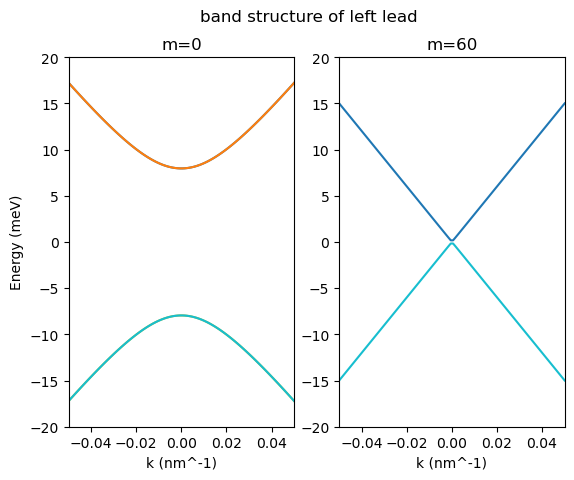

In [75]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.suptitle('band structure of left lead')

syst1=make_syst(width=60,leads_model=model_MTI()).leads[0]
syst2=make_syst(width=60,length=250,leads_model=model_MTI()).leads[0]

ax1.set_ylabel('Energy (meV)')

xlim=0.05
ylim=20


for ax in (ax1,ax2):
    ax.set_xlabel('k (nm^-1)')
    ax.set_ylim(-ylim,ylim)
    ax.set_xlim(-xlim,xlim)
    


m1=0
m2=60
kwant.plotter.bands(syst1,momenta=np.linspace(-xlim,xlim, 100), ax=ax1, params=dict(m=m1));
kwant.plotter.bands(syst2,momenta=np.linspace(-xlim,xlim , 100), ax=ax2, params=dict(m=m2));
ax1.set_title(f'm={m1}')
ax2.set_title(f'm={m2}') 

In [1]:
syst1=make_syst(width=60,leads_model=model_MTI()).leads[0]
##
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(14, 4))
fig.suptitle('band structure of left lead', size='xx-large')

ax1.set_ylabel('Energy (meV)')
for ax in zip((ax1,ax2,ax3,ax4,ax5),(10,12,14,16,18)):
    ax[0].set_xlabel('k (nm^-1)')
    ax[0].set_ylim(-15,50)
    ax[0].set_xlim(-0.05,0.05)
    ax[0].set_title(f'm={ax[1]}')
    kwant.plotter.bands(syst1,momenta=np.linspace(-0.05, 0.05, 50), ax=ax[0], params=dict(m=ax[1]));


NameError: name 'make_syst' is not defined

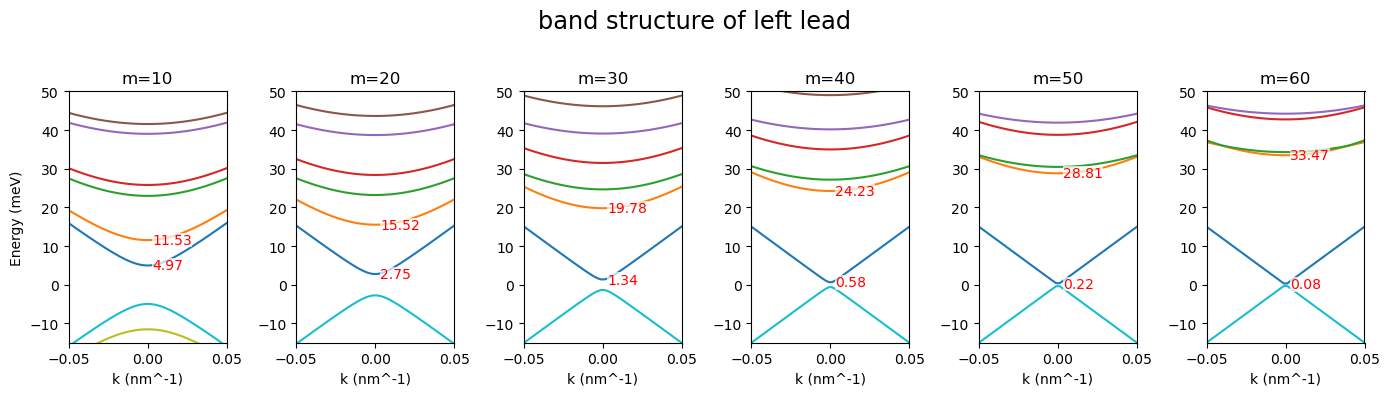

In [175]:
syst1 = make_syst(width=60, leads_model=model_MTI()).leads[0]

fig, (ax1, ax2, ax3, ax4, ax5,ax6) = plt.subplots(1, 6, figsize=(14, 4))
fig.suptitle('band structure of left lead', size='xx-large')

ax1.set_ylabel('Energy (meV)')

# 使用修正后的循环
for ax_tuple in zip((ax1, ax2, ax3, ax4, ax5,ax6), (10, 20, 30, 40, 50, 60)):
    ax = ax_tuple[0]
    m_val = ax_tuple[1]
    
    ax.set_xlabel('k (nm^-1)')
    ax.set_ylim(-15, 50)
    ax.set_xlim(-0.05, 0.05)
    ax.set_title(f'm={m_val}')
    
    # 绘制能带图
    kwant.plotter.bands(syst1, momenta=np.linspace(-0.05, 0.05, 50), ax=ax, params=dict(m=m_val))

    # --- 以下是修正后的代码 ---
    
    # 1. 为电极创建一个能带计算对象
    bands = kwant.physics.Bands(syst1, params=dict(m=m_val))
    
    # 2. 使用该对象计算 k=0 时的能量值
    energies_at_k0 = bands(k=0)
    
    # --- 后续的标注代码保持不变 ---
    conduction_bands = energies_at_k0[energies_at_k0 > 0]
    
    if len(conduction_bands) >= 2:
        e_cond1 = conduction_bands[0]
        e_cond2 = conduction_bands[1]
        
        ax.text(0.003, e_cond1, f'{e_cond1:.2f}', 
                ha='left', va='center', color='red',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=0.1))

        ax.text(0.003, e_cond2, f'{e_cond2:.2f}', 
                ha='left', va='center', color='red',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=0.1))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

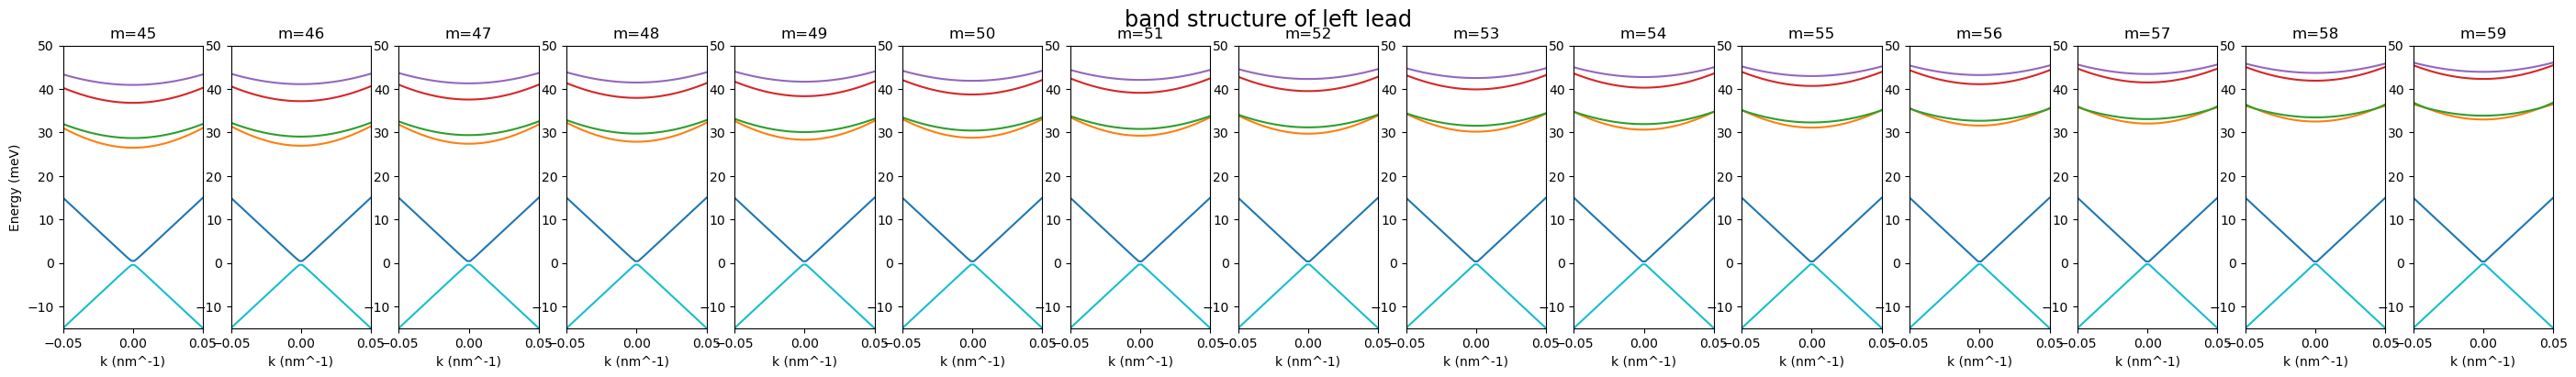

In [10]:
syst1=make_syst(width=60,leads_model=model_MTI()).leads[0]

fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15) = plt.subplots(1,15, figsize=(35, 4))
fig.suptitle('band structure of left lead', size='xx-large')

ax1.set_ylabel('Energy (meV)')
for ax in zip((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15),(45,46,47,48,49,50,51,52,53,54,55,56,57,58,59)):
    ax[0].set_xlabel('k (nm^-1)')
    ax[0].set_ylim(-15,50)
    ax[0].set_xlim(-0.05,0.05)
    ax[0].set_title(f'm={ax[1]}')
    kwant.plotter.bands(syst1,momenta=np.linspace(-0.05, 0.05, 50), ax=ax[0], params=dict(m=ax[1]));

## G matrix

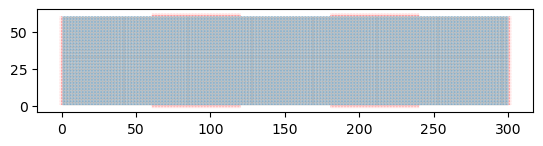

In [5]:
syst=make_syst(width=60,length=300,leads_model=model_MTI())
kwant.plot(syst);

In [6]:
tmatrix = kwant.smatrix(syst, 3.0,params=dict(m=10))
tm=tmatrix.conductance_matrix()
np.round(tm,2)

array([[-0., -0., -0., -0., -0., -0.],
       [-0., -0., -0., -0., -0., -0.],
       [-0., -0., -0., -0., -0., -0.],
       [-0., -0., -0., -0., -0., -0.],
       [-0., -0., -0., -0., -0., -0.],
       [-0., -0., -0., -0., -0., -0.]])

## Disensity of current

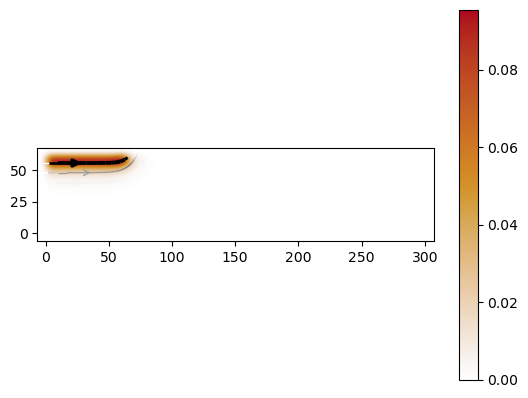

Text(0.5, 1.0, 'm=20')

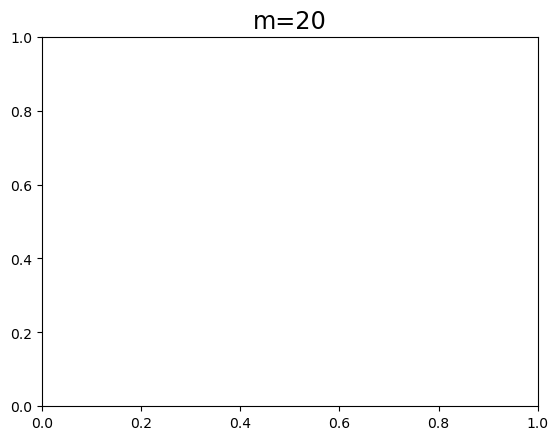

In [ ]:
fsyst = make_syst(width=60,length=300,leads_model=model_MTI())

J=kwant.operator.Current(fsyst)            #这个对象是一个电流算符，可以用来计算系统 fsyst 中任意两个相邻格点（跳跃，hopping）之间的局部电流密度。wf[0][0] 通常表示从第一个引线注入的波函数在第一个自旋/轨道通道中的分量（具体取决于模型的自由度）。
wf=kwant.wave_function(fsyst, energy=8,params=dict(m=60))  #它是一个包含了已计算好的散射波函数集合的对象。
psi=wf(0)[0]                               #为什么只有一个一个轨道模型
current = J(psi)
kwant.plotter.current(fsyst, current, colorbar=True, show=True)

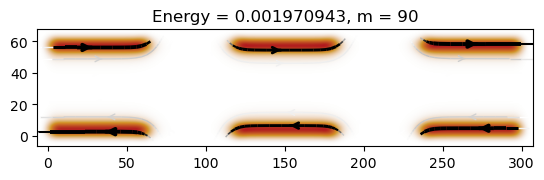

In [79]:
fsyst = make_syst(width=60,length=300,leads_model=model_MTI())

energy_val = 0.001970943
m_val = 90

J=kwant.operator.Current(fsyst)
wf=kwant.wave_function(fsyst, energy=energy_val, params=dict(m=m_val))
psi=wf(0)[0]
current = J(psi)

fig, ax = plt.subplots()
kwant.plotter.current(fsyst, current, ax=ax, colorbar=True)
ax.set_title(f'Energy = {energy_val}, m = {m_val}')
plt.show()

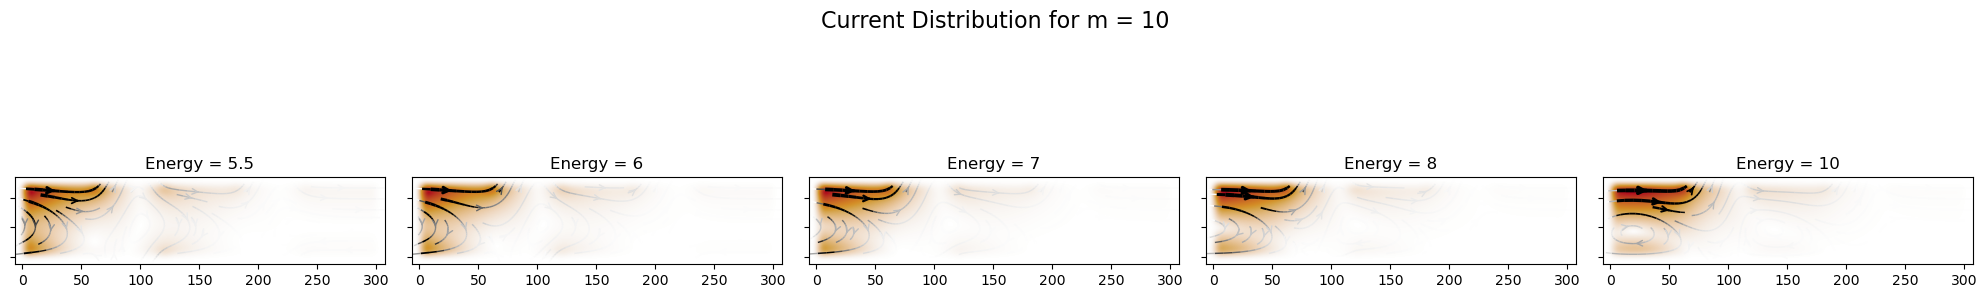

In [105]:

fsyst = make_syst(width=60, length=300, leads_model=model_MTI())
J = kwant.operator.Current(fsyst)

m_val = 10
energy_values = [5.5, 6, 7, 8, 10]
num_plots = len(energy_values)
fig, axes = plt.subplots(1, num_plots, figsize=(20, 4))
fig.suptitle(f'Current Distribution for m = {m_val}', fontsize=16)


for ax, energy_val in zip(axes, energy_values):
    
    wf = kwant.wave_function(fsyst, energy=energy_val, params=dict(m=m_val))
    psi = wf(0)[0]
    current = J(psi)
    kwant.plotter.current(fsyst, current, ax=ax, colorbar=False)

    ax.set_title(f'Energy = {energy_val}')
    ax.set_yticklabels([])

plt.tight_layout()
plt.show()

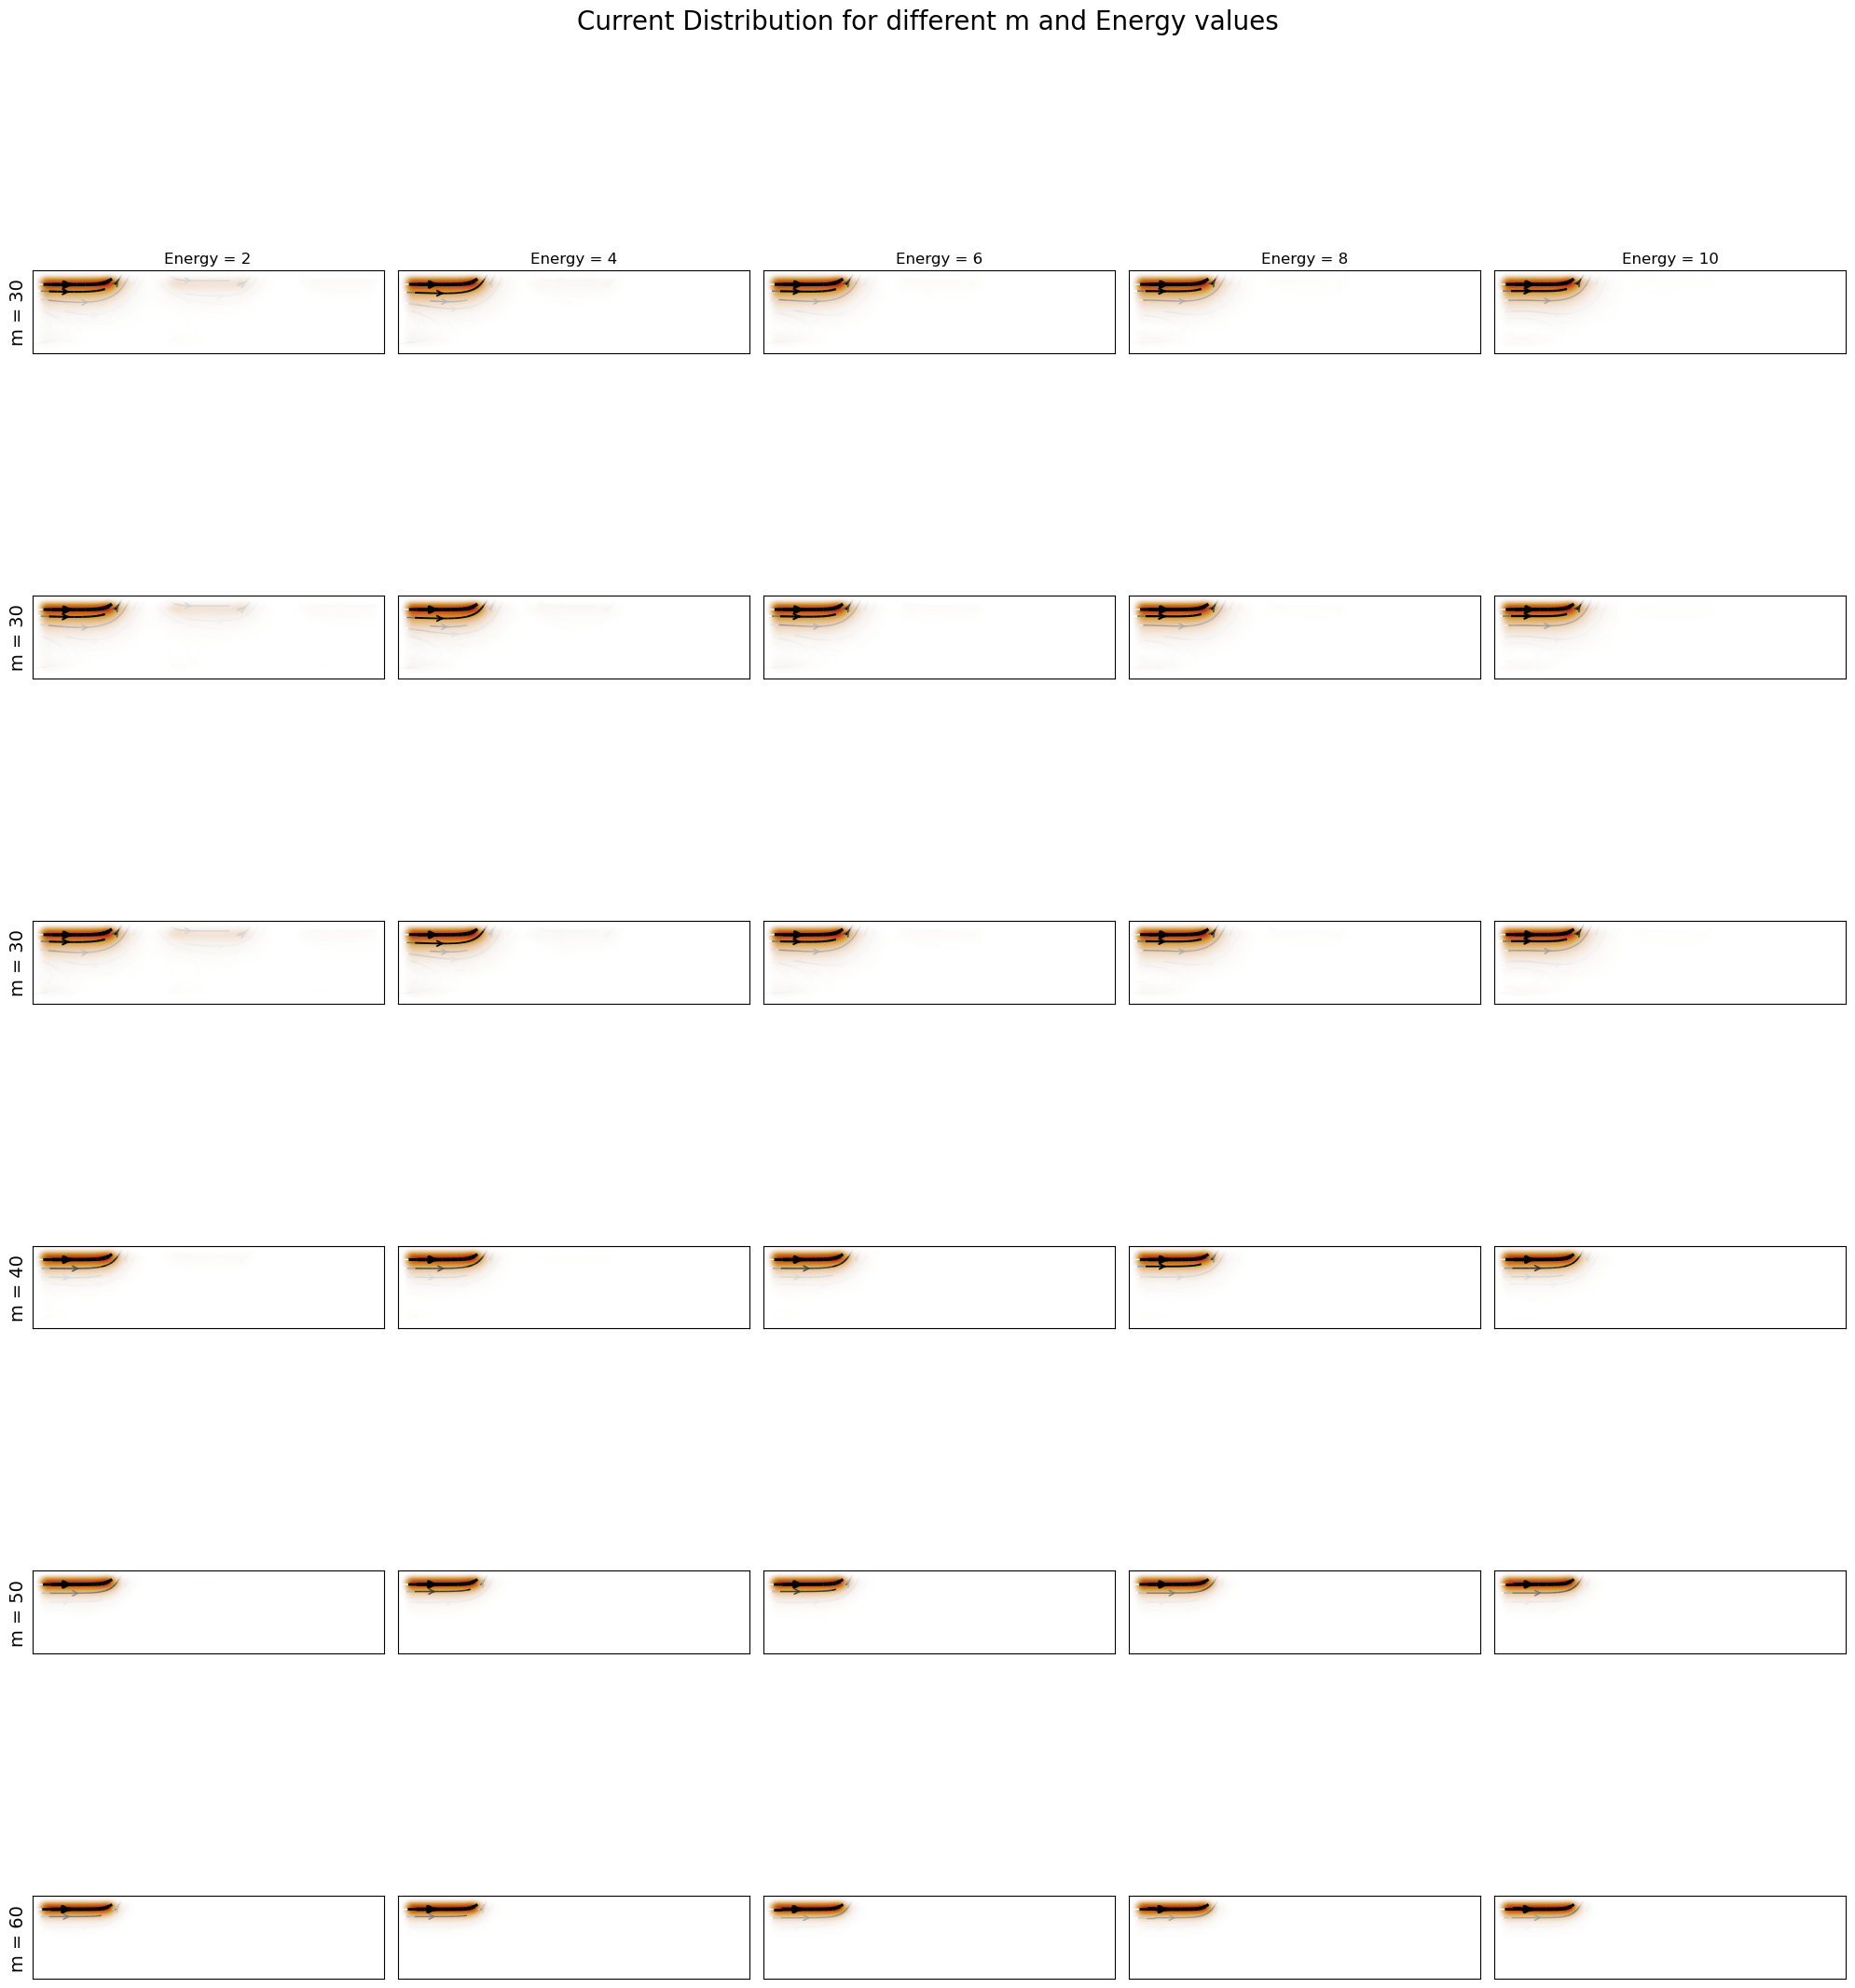

In [ ]:
# 1. 定义 m 值和 energy 值的列表
m_values = [10,20, 30, 40, 50, 60]  # 6个不同的 m 值，对应6行
energy_values = [2, 4, 6, 8, 10]   # 5个不同的 energy 值，对应5列

num_rows = len(m_values)
num_cols = len(energy_values)

# 2. 创建 6x5 的子图网格
#    figsize可以根据需要调整，(列数*4, 行数*4) 是一个不错的起点
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 24))
fig.suptitle('Current Distribution for different m and Energy values', fontsize=20)

# 预先构建系统和算符，避免在循环中重复构建
fsyst = make_syst(width=60, length=300, leads_model=model_MTI())
J = kwant.operator.Current(fsyst)

# 3. 使用嵌套循环遍历 m 和 energy
for row_idx, m_val in enumerate(m_values):
    for col_idx, energy_val in enumerate(energy_values):
        
        # 从 2D axes 数组中获取当前要操作的子图
        ax = axes[row_idx, col_idx]
        
        # 计算波函数和电流 (核心逻辑与你原来的一样)
        # 注意：params 现在使用循环中的 m_val
        wf = kwant.wave_function(fsyst, energy=energy_val, params=dict(m=m_val))
        psi = wf(0)[0]  # 波函数来自第一个电极(lead 0)的第一个模式(mode 0)
        current = J(psi)
        
        # 在对应的子图上绘图
        kwant.plotter.current(fsyst, current, ax=ax, colorbar=False)

        # 4. 优化标签和标题，避免重复
        # 只在第一行显示能量标题
        if row_idx == 0:
            ax.set_title(f'Energy = {energy_val}')
        
        # 只在第一列显示 m 值的标签
        if col_idx == 0:
            ax.set_ylabel(f'm = {m_val}', fontsize=14)
            
        # 隐藏内部图的刻度，让图像更整洁
        ax.set_xticks([])
        ax.set_yticks([])

# 调整子图间距并显示图像
plt.tight_layout(rect=[0, 0, 1, 0.98]) # rect调整，为总标题留出空间
plt.show()

--- 正在分析能量 E = 20 (m = 10) 时的引线通道 ---
  引线 0: 4 个可用通道 (传播模式)
  引线 1: 4 个可用通道 (传播模式)
  引线 2: 4 个可用通道 (传播模式)
  引线 3: 4 个可用通道 (传播模式)
  引线 4: 4 个可用通道 (传播模式)
  引线 5: 4 个可用通道 (传播模式)
--- 通道分析完毕 ---

正在选择入射波函数：来自引线 0，通道 0...
正在计算电流分布...
正在绘制电流图...


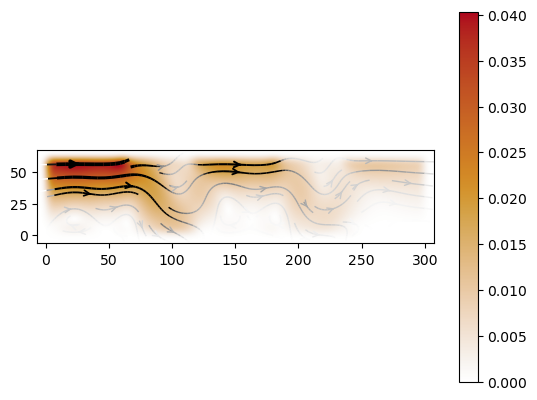

In [9]:
fsyst = make_syst(width=60, length=300, leads_model=model_MTI())

energy_val = 20
m_value = 10

print(f"--- 正在分析能量 E = {energy_val} (m = {m_value}) 时的引线通道 ---")
if 'fsyst' in locals():
    for i, lead in enumerate(fsyst.leads):
        modes = lead.modes(energy=energy_val, params=dict(m=m_value))
        num_channels = modes[0].wave_functions.shape[1]
        print(f"  引线 {i}: {num_channels} 个可用通道 (传播模式)")
    print("--- 通道分析完毕 ---\n")
else:
    print("错误：系统 'fsyst' 未被创建，无法分析通道。")

J = kwant.operator.Current(fsyst)
wf = kwant.wave_function(fsyst, energy=energy_val, params=dict(m=m_value))

print("正在选择入射波函数：来自引线 0，通道 0...")
psi = wf(0)[0]

print("正在计算电流分布...")
current = J(psi)

print("正在绘制电流图...")
kwant.plotter.current(fsyst, current, colorbar=True, show=True)

## Distribution of wave function

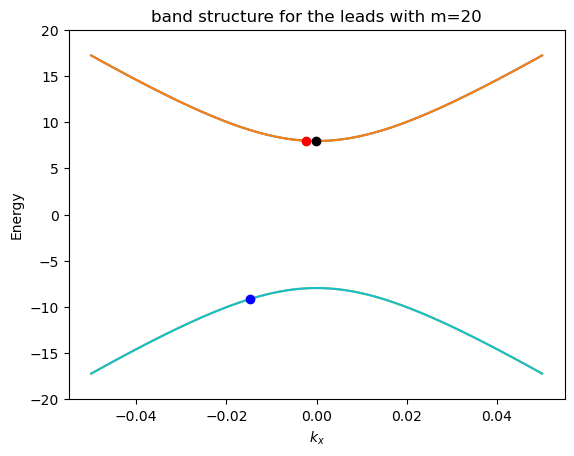

In [67]:
syst1=make_syst(width=60,length=300,leads_model=model_MTI()).leads[0]

bands = kwant.physics.Bands(syst1, params=dict(m=0))
momenta=np.linspace(-0.05, 0.05, 200)

es=[]
evs=[]
for k in momenta:
    tem_a,tem_b= bands(k=k,return_eigenvectors = True) 
    es.append(tem_a)
    evs.append(tem_b)

# the 100th, 96th and 70th states (k values) are chosen, the 120th energy level (band) is chosen
plt.plot(momenta,es);
plt.plot(momenta[99], es[99][120], 'ko')
plt.plot(momenta[95], es[99][121], 'ro')
plt.plot(momenta[70], es[70][119], 'bo')
plt.ylim(-20,20)
plt.xlabel('$k_x$')
plt.ylabel('Energy')
plt.title('band structure for the leads with m=20');

Text(0, 0.5, 'possibility of the wavefunction')

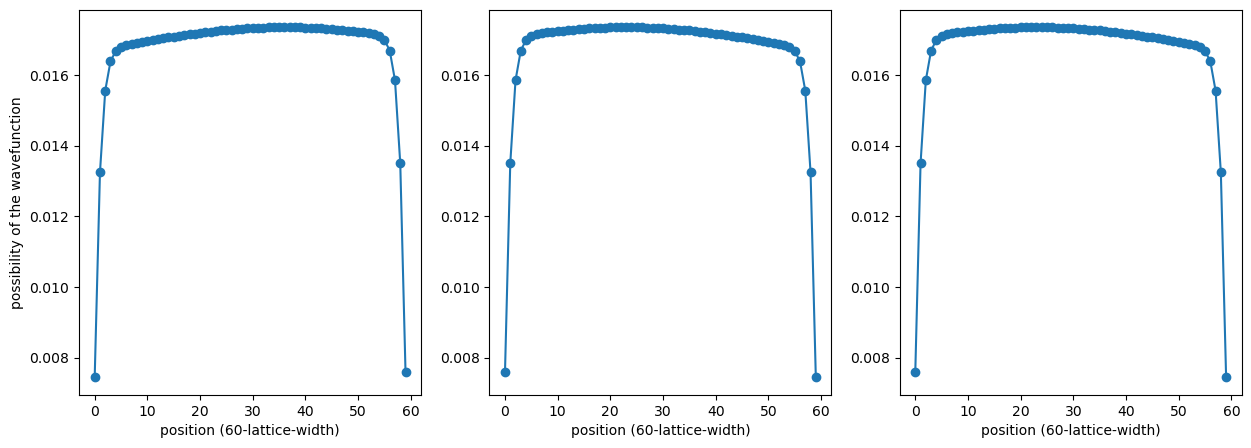

In [68]:
swf1=np.abs(evs[100][:,121])**2
swf2=np.abs(evs[100][:,120])**2
swf3=np.abs(evs[99][:,120])**2
fig,(ax1,ax2,ax3)=plt.subplots(1,3, figsize=(15,5))
ax1.plot(range(60),swf1.reshape((-1,4)).sum(1),'-o')
ax2.plot(range(60),swf2.reshape((-1,4)).sum(1),'-o')
ax3.plot(range(60),swf3.reshape((-1,4)).sum(1),'-o')

for ax in (ax1,ax2,ax3):
    ax.set_xlabel('position (60-lattice-width)')
ax1.set_ylabel('possibility of the wavefunction')

#可以看出传输模式的波函数集中在边缘

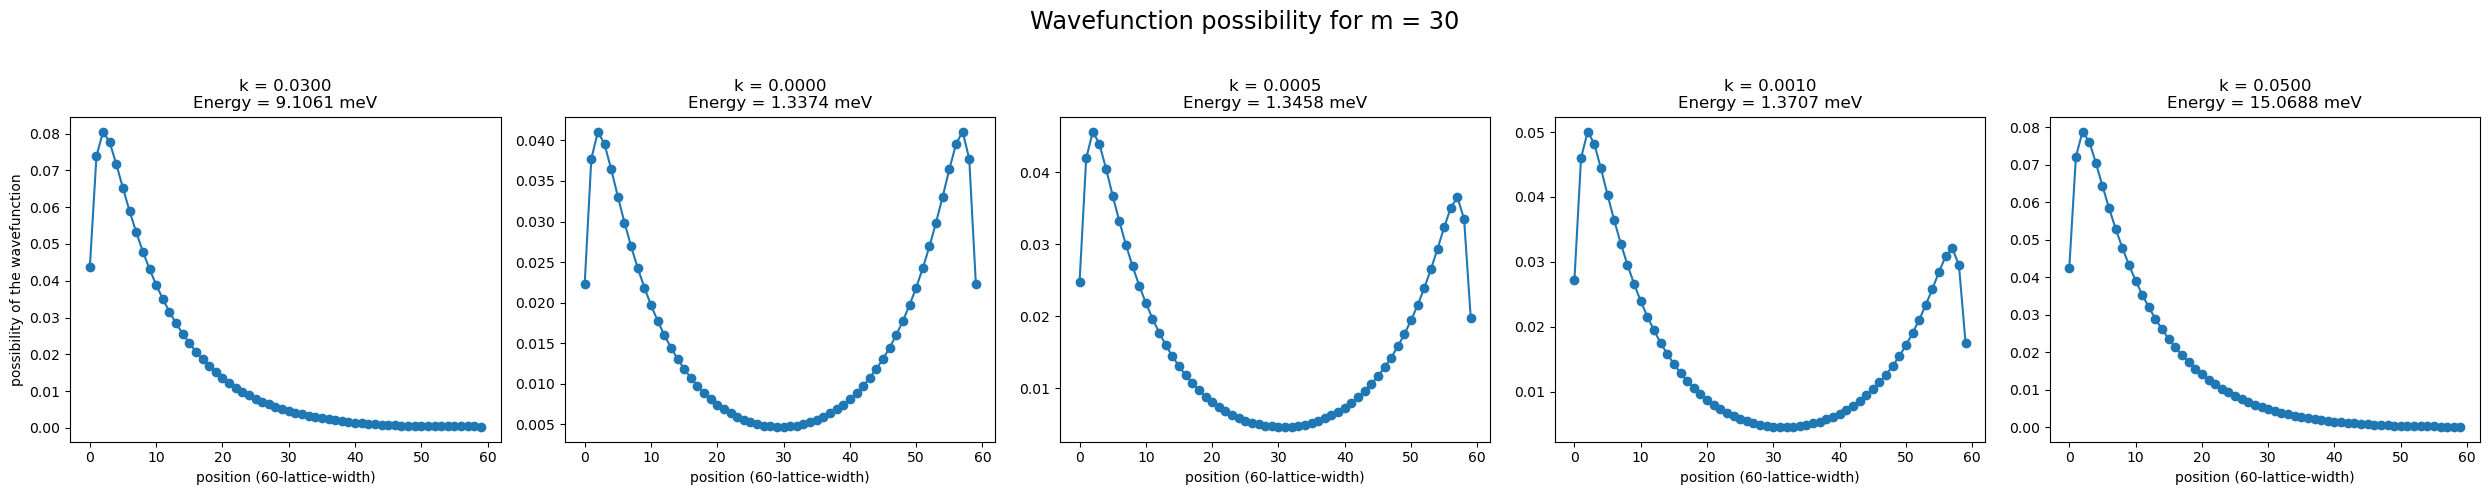

In [186]:
syst1 = make_syst(width=60, length=300, leads_model=model_MTI()).leads[0]

m_val = 30
bands = kwant.physics.Bands(syst1, params=dict(m=m_val))
momenta = np.linspace(-0.05, 0.05, 201)

es = []
evs = []
for k in momenta:
    tem_a, tem_b = bands(k=k, return_eigenvectors=True)
    es.append(tem_a)
    evs.append(tem_b)

# --- 以下是修改后的绘图部分 ---

# 1. 定义您感兴趣的动量索引和能带索引
k_indices = [160,100,101,102,200]
band_index = 120
num_plots = len(k_indices)

# 2. 创建子图
fig, axes = plt.subplots(1, num_plots, figsize=(25, 5))

# 3. 设置主标题
fig.suptitle(f'Wavefunction possibility for m = {m_val}', size='xx-large')

# 4. 循环遍历每个子图和对应的k索引
for ax, k_idx in zip(axes, k_indices):
    
    # 从列表中获取对应的本征矢量和本征值数据
    eigenvectors = evs[k_idx]
    eigenvalues = es[k_idx] # 获取当前k值下的所有本征能量
    
    # 计算波函数概率密度
    swf = np.abs(eigenvectors[:, band_index])**2
    
    # 在当前子图(ax)上绘图
    ax.plot(range(60), swf.reshape((-1, 4)).sum(1), '-o')
    
    # --- 【核心修改】设置子图标题，同时显示k值和本征值(es) ---
    k_value = momenta[k_idx]
    # 根据能带索引(band_index)获取对应的单个本征值
    eigenvalue = eigenvalues[band_index] 
    # 使用 \n 换行符让标题分两行显示，更加美观
    ax.set_title(f'k = {k_value:.4f}\nEnergy = {eigenvalue:.4f} meV')

    # 设置坐标轴标签
    ax.set_xlabel('position (60-lattice-width)')

# 统一设置Y轴标签
axes[0].set_ylabel('possibility of the wavefunction')

# 自动调整布局并显示
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

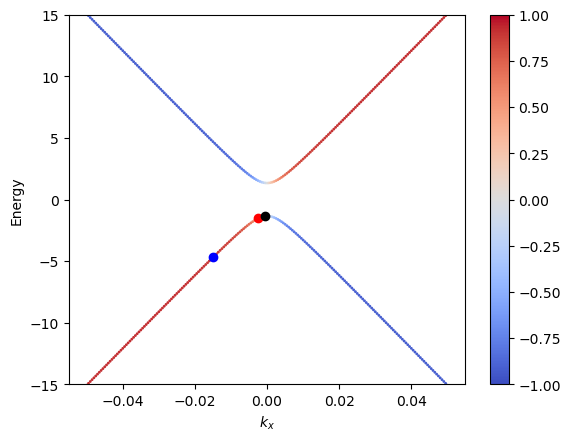

In [156]:
zcolors=[]
for k in range(len(momenta)):
    tem_1=[]
    for i in range(np.array(es).shape[1]):
            swf=np.reshape(np.abs(evs[k][:,i])**2,(-1,2)).sum(1)
            tem_c=swf.reshape(2,-1).sum(1)
            tem_1.append(tem_c[0]-tem_c[1])
    zcolors.append(tem_1)

    
for i in range(np.array(es).shape[1]):
    plt.scatter(momenta,np.array(es)[:,i],s=1,c=np.array(zcolors)[:,i],cmap="coolwarm",vmin=-1.,vmax=1.)
plt.plot(momenta[70], es[70][119], 'bo')
plt.plot(momenta[95], es[95][119], 'ro')
plt.plot(momenta[99], es[99][119], 'ko')
plt.ylim(-15,15)
plt.xlabel('$k_x$')
plt.ylabel('Energy')
plt.colorbar();

## R

In [157]:
def find_voltages(tmatrix,current):
    try:
        voltage = np.linalg.solve(tmatrix[1:, 1:], current[1:])
    except np.linalg.LinAlgError as err:
        if 'Singular matrix' in str(err):
            print("Hi there, singular matrix here")
            voltage = [0,0,0,0,0]
        else:
            raise
    return [0, *voltage]

def resistance_xx(tmatrix):
    current = [1, 0, 0, -1, 0, 0]
    voltage = find_voltages(tmatrix,current)
    
    def resistance(lead1, lead2):
        return voltage[lead1-1]-voltage[lead2-1]

    return resistance(2, 3)

def resistance_xy(tmatrix):
    current = [1, 0, 0, -1, 0, 0]
    voltage = find_voltages(tmatrix,current)
    
    def resistance(lead1, lead2):
        return voltage[lead1-1]-voltage[lead2-1]

    return resistance(2, 6)

def resistance_12_45(tmatrix):
    current = [1, 0, -1, 0, 0, 0]
    voltage = find_voltages(tmatrix,current)
    
    def resistance(lead1, lead2):
        return voltage[lead1-1]-voltage[lead2-1]

    return resistance(4, 5)

def rMplot(m_list, data, ptitle='resistance vs m'):
    rxx=[]
    rxy=[]
    for i in range(data.shape[0]):
        rxx.append(resistance_xx(data[i]))
        rxy.append(resistance_xy(data[i]))

    plt.plot(m_list,rxx,'-o', label='$R_{xx}$')
    plt.plot(m_list,rxy,'-o', label='$R_{xy}$')

    plt.title(ptitle, size='xx-large')
    plt.xlabel('m')
    plt.ylabel('Resistance')
    plt.legend()

def rMplot_12_45(m_list, data, ptitle='resistance vs m'):
    r12_45=[]
    for i in range(data.shape[0]):
        r12_45.append(resistance_12_45(data[i]))

    plt.plot(m_list,r12_45,'-o', label='$R_{12,45}$')

    plt.title(ptitle, size='xx-large')
    plt.xlabel('m')
    plt.ylabel('Resistance')
    plt.legend()

# define a function to plot the resistance vs energy
# here, "data" is a "np.array", a list (different energy) of 6*6 transimission matrices=[]
def rEplot(energies, data, ptitle='resistance vs energy'):
    rxx=[]
    rxy=[]
    for i in range(data.shape[0]):
        rxx.append(resistance_xx(data[i]))
        rxy.append(resistance_xy(data[i]))

    plt.plot(energies,rxx,'-o', label='$R_{xx}$')
    plt.plot(energies,rxy,'-o', label='$R_{xy}$')

    plt.title(ptitle, size='xx-large')
    plt.xlabel('Energy')
    plt.ylabel('Resistance')
    plt.legend()

def rEplot_12_45(energies, data, ptitle='resistance vs energy'):
    r12_45=[]
    for i in range(data.shape[0]):
        r12_45.append(resistance_12_45(data[i]))

    plt.plot(energies,r12_45,'-o', label='$R_{12,45}$')

    plt.title(ptitle, size='xx-large')
    plt.xlabel('Energy')
    plt.ylabel('Resistance')
    plt.legend()


## R VS m

In [ ]:
data=[]
rsyst=make_syst(width=60,length=300,leads_model=model_MTI())
m_range=np.linspace(1,60,num=30)
energy_val = 9.0
for m_value in m_range:
    tmatrix = kwant.smatrix(rsyst, energy_val,params=dict(m=m_value))
    data.append(tmatrix.conductance_matrix())

# cost around 2 mins

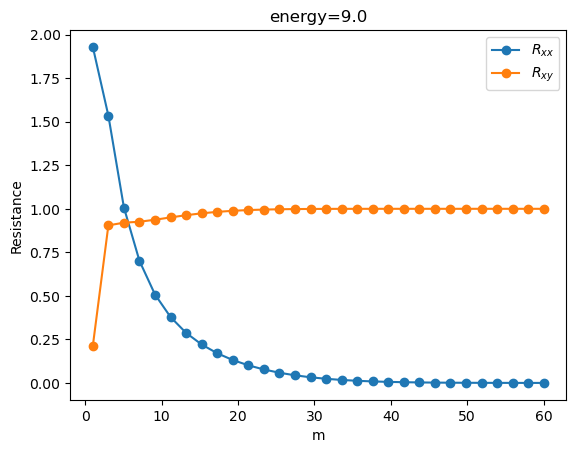

In [94]:
# 图一
rMplot(m_range,np.array(data))
plt.title(f'energy={energy_val}');

In [95]:
# 列表一
rxy_values = [resistance_xy(tmatrix) for tmatrix in data]
rxx_values = [resistance_xx(tmatrix) for tmatrix in data]
print(f"{'m':<10} | {'R_xy':<18} | {'R_xx':<18}")
print("-" * 50) # 打印分割线

for i in range(len(m_range)):
    m_val = m_range[i]
    rxy_val = rxy_values[i]
    rxx_val = rxx_values[i]
    print(f"{m_val:<10.4f} | {rxy_val:<18.8f} | {rxx_val:<18.8f}")

m          | R_xy               | R_xx              
--------------------------------------------------
1.0000     | 0.21247627         | 1.92959808        
3.0345     | 0.90483166         | 1.53490662        
5.0690     | 0.92034193         | 1.00735941        
7.1034     | 0.92570246         | 0.70088561        
9.1379     | 0.93722212         | 0.50765168        
11.1724    | 0.95059230         | 0.37829773        
13.2069    | 0.96328347         | 0.28733923        
15.2414    | 0.97401680         | 0.22075318        
17.2759    | 0.98238354         | 0.17046556        
19.3103    | 0.98850395         | 0.13164152        
21.3448    | 0.99275283         | 0.10126613        
23.3793    | 0.99557348         | 0.07736786        
25.4138    | 0.99737392         | 0.05858135        
27.4483    | 0.99848350         | 0.04389855        
29.4828    | 0.99914590         | 0.03252961        
31.5172    | 0.99953002         | 0.02382818        
33.5517    | 0.99974691         | 0.01725356    

In [11]:
np.round(data[6],2)

array([[ 1.  , -1.  , -0.  , -0.  , -0.  , -0.  ],
       [-0.  ,  1.  , -0.99, -0.  , -0.  , -0.01],
       [-0.  , -0.  ,  1.  , -1.  , -0.  , -0.  ],
       [-0.  , -0.  , -0.  ,  1.  , -1.  , -0.  ],
       [-0.  , -0.  , -0.01, -0.  ,  1.  , -0.99],
       [-1.  , -0.  , -0.  , -0.  , -0.  ,  1.  ]])

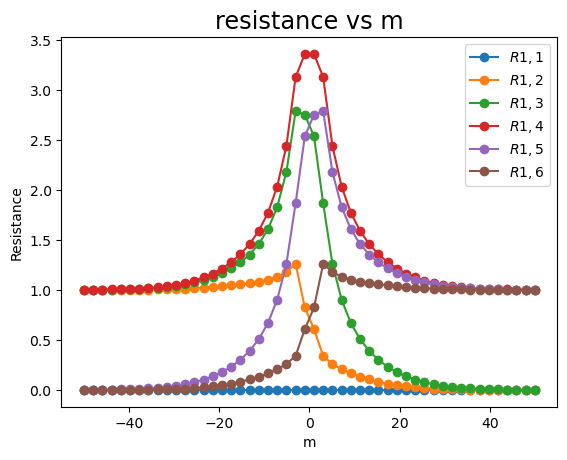

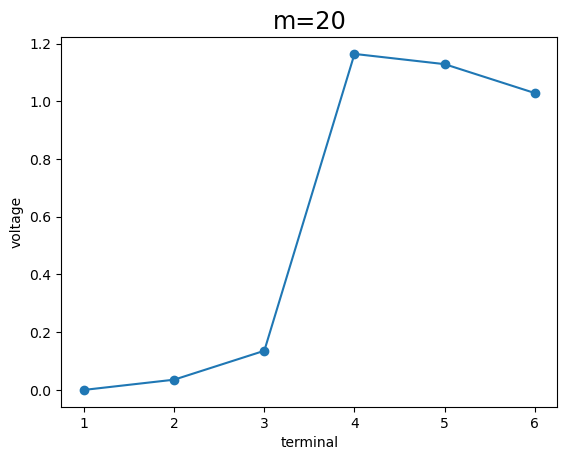

In [12]:
# One m, one resistance
r=[]
def rMplot_m(m_list, data, lead1=2,lead2=5, ptitle='resistance vs m'):
    current = [1, 0, 0, -1, 0, 0]
    rx=[]
    for i in range(data.shape[0]):
        voltage = find_voltages(data[i],current)
        rx.append(voltage[lead1-1]-voltage[lead2-1])
    r.append(rx[35])
    plt.plot(m_list,rx,'-o', label=f'$R {lead1},{lead2}$')

    plt.title(ptitle, size='xx-large')
    plt.xlabel('m')
    plt.ylabel('Resistance')
    plt.legend()
# double 3
rMplot_m(m_range,np.array(data),1,1)
rMplot_m(m_range,np.array(data),1,2)
rMplot_m(m_range,np.array(data),1,3)
rMplot_m(m_range,np.array(data),1,4)
rMplot_m(m_range,np.array(data),1,5)
rMplot_m(m_range,np.array(data),1,6)
plt.show()

#voltage vs n
np.round(r,2)
num=[]
for i in range(7):
    num.append(i)
del num[0]
plt.plot(num,r,'-o', label='R')
plt.title("m=20", size='xx-large')
plt.xlabel('terminal')
plt.ylabel('voltage')
plt.show()


## R VS E

Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here


Text(0.5, 1.0, 'm=20')

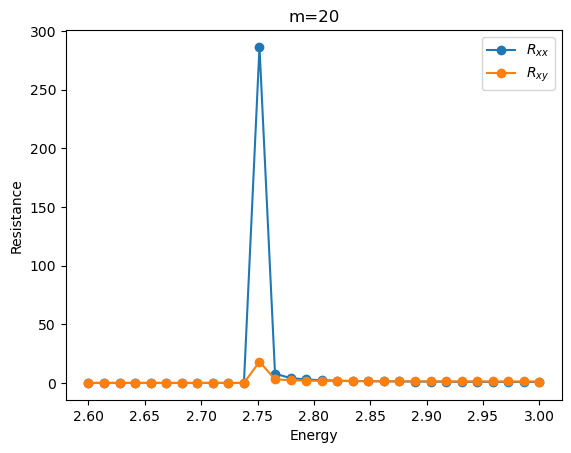

In [179]:
data=[]
e_range=np.linspace(2.78,3,num=30)
m_val=20
for energy in e_range:
    tmatrix = kwant.smatrix(syst, energy,params=dict(m=m_val))
    data.append(tmatrix.conductance_matrix())


rEplot(e_range,np.array(data))    
plt.title(f'm={m_val}')

# 3.5s per s-matrix

Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here


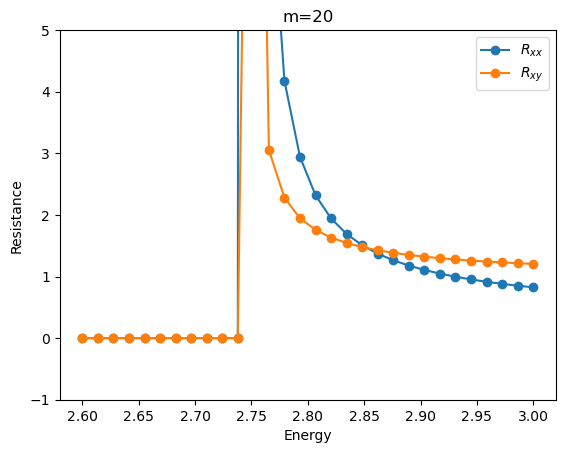

In [181]:
rEplot(e_range,np.array(data))    
plt.title(f'm={m_val}')
plt.ylim(-1,5);

In [138]:
np.round(data[23],3)

array([[ 0.993, -0.001, -0.   , -0.   , -0.008, -0.984],
       [-0.984,  0.993, -0.   , -0.   , -0.001, -0.008],
       [-0.008, -0.98 ,  0.993, -0.001, -0.003, -0.001],
       [-0.   , -0.008, -0.984,  0.993, -0.001, -0.   ],
       [-0.   , -0.001, -0.008, -0.984,  0.993, -0.   ],
       [-0.001, -0.003, -0.001, -0.008, -0.98 ,  0.993]])

## 定E、定m系统计算

### 端口电压、绘图

In [217]:
syst=make_syst(width=60,length=300,leads_model=model_MTI())

m_value = 30
e_value=  18
tmatrix = kwant.smatrix(syst,e_value,params=dict(m=m_value))
conductance_mat = tmatrix.conductance_matrix()
c=np.round(conductance_mat, 2)
X = np.abs(tmatrix.data)**2

print(c)

[[ 0.98 -0.01 -0.   -0.   -0.02 -0.95]
 [-0.95  0.99 -0.   -0.   -0.01 -0.02]
 [-0.02 -0.88  0.99 -0.01 -0.07 -0.01]
 [-0.   -0.02 -0.95  0.98 -0.01 -0.  ]
 [-0.   -0.01 -0.02 -0.95  0.99 -0.  ]
 [-0.01 -0.07 -0.01 -0.02 -0.88  0.99]]


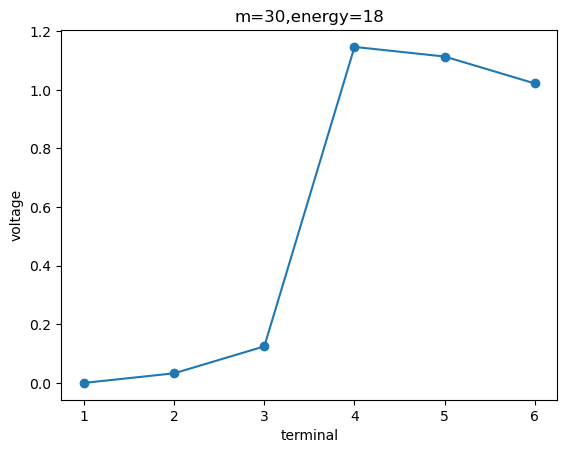

In [218]:
current= [-1, 0, 0, 1, 0, 0]
r=find_voltages(conductance_mat,current)

#voltage vs n
np.round(r,2)

plt.plot(range(1,7),r,'-o', label='R')
plt.title(f'm={m_value},energy={e_value}')
plt.xlabel('terminal')
plt.ylabel('voltage')
plt.show()

## Nonlocla measurement 12,45

### R VS M

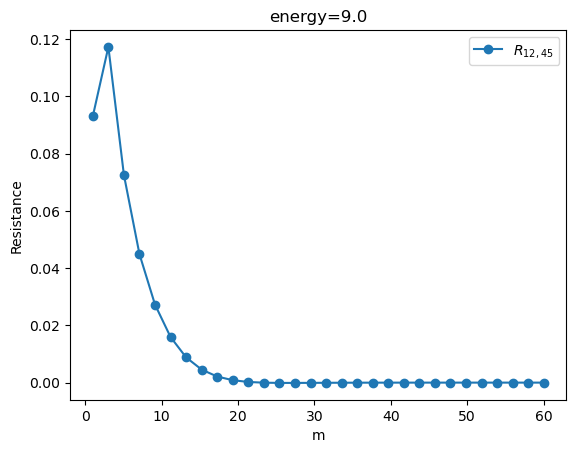

In [159]:
data=[]
rsyst=make_syst(width=60,length=300,leads_model=model_MTI())
m_range=np.linspace(1,60,num=30)
energy_val = 9.0
for m_value in m_range:
    tmatrix = kwant.smatrix(rsyst, energy_val,params=dict(m=m_value))
    data.append(tmatrix.conductance_matrix())


rMplot_12_45(m_range,np.array(data))
plt.title(f'energy={energy_val}');    

### R VS E

Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here
Hi there, singular matrix here


Text(0.5, 1.0, 'm=10')

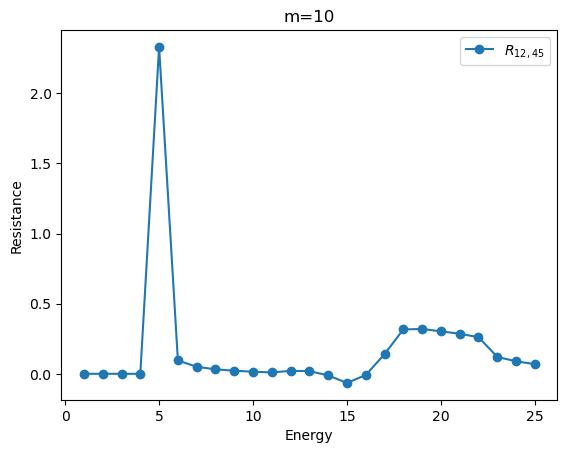

In [167]:
data=[]
e_range=np.linspace(1,25,num=25)
m_val=10
for energy in e_range:
    tmatrix = kwant.smatrix(syst, energy,params=dict(m=m_val))
    data.append(tmatrix.conductance_matrix())


rEplot_12_45(e_range,np.array(data))    
plt.title(f'm={m_val}')